# **Final Project Task 5 - Census Modeling NN Regression**

Requirements

- Create a NN regression model on the Census dataset, with 'hours-per-week' target

- Model Selection and Setup:
    - Build a neural network model using a deep learning library like TensorFlow, Keras or PyTorch.
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - Train a simple NN model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable.
    - Feature Selection:
        - Neural Networks can learn feature importance automatically, so all relevant features should be included rather than manually selecting a subset.
        - Consider using embeddings for high-cardinality categorical features instead of one-hot encoding to improve efficiency.
    - Experimentation:
        - Focus on preprocessing techniques rather than manually selecting feature combinations. Ensure numerical features are normalized (e.g., MinMaxScaler, StandardScaler) and categorical features are properly encoded (e.g., one-hot encoding or embeddings for high-cardinality variables).
        - Experiment with different neural network architectures (e.g., number of layers, neurons per layer) and hyperparameters (e.g., activation functions, learning rates, dropout rates, and batch sizes).
        - Use techniques such as early stopping and learning rate scheduling to optimize model performance and prevent overfitting.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
31772,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
1710,73,Private,267408,HS-grad,9,Widowed,Sales,Other-relative,White,Female,0,0,15,United-States,<=50K
29551,33,Private,288840,HS-grad,9,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,38,United-States,<=50K
17147,44,Private,175943,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,20,United-States,<=50K
24607,38,Private,205359,11th,7,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,32,United-States,<=50K
9932,28,Self-emp-not-inc,200515,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
32384,62,Private,170984,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
18237,23,Private,133515,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
12339,20,Local-gov,271354,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
26515,41,Private,104892,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,2829,0,40,United-States,<=50K


In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv("preprocessed_data.csv")

X = data.drop("hours-per-week", axis=1)
y = data["hours-per-week"]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }


In [8]:
from sklearn.neural_network import MLPRegressor

baseline_nn = MLPRegressor(
    hidden_layer_sizes=(64,),
    activation="relu",
    max_iter=300,
    random_state=42
)

baseline_nn.fit(X_train, y_train)

base_pred = baseline_nn.predict(X_test)
base_results = evaluate(y_test, base_pred)


In [9]:
deep_nn = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation="relu",
    learning_rate_init=0.001,
    max_iter=600,
    random_state=42
)

deep_nn.fit(X_train, y_train)

deep_pred = deep_nn.predict(X_test)
deep_results = evaluate(y_test, deep_pred)


In [10]:
regularized_nn = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    alpha=0.001,   # regularizare L2
    max_iter=600,
    random_state=42
)

regularized_nn.fit(X_train, y_train)

reg_pred = regularized_nn.predict(X_test)
reg_results = evaluate(y_test, reg_pred)


In [11]:
results_nn = pd.DataFrame([
    ["Baseline NN", *base_results.values()],
    ["Deep NN", *deep_results.values()],
    ["Regularized NN", *reg_results.values()]
], columns=["Experiment", "MAE", "MSE", "RMSE", "R2"])

results_nn = results_nn.round(3).sort_values("RMSE")
results_nn


,Experiment,MAE,MSE,RMSE,R2
0,Baseline NN,0.090,0.016,0.128,1.000
2,Regularized NN,0.140,0.039,0.197,0.999
1,Deep NN,0.177,0.047,0.216,0.999


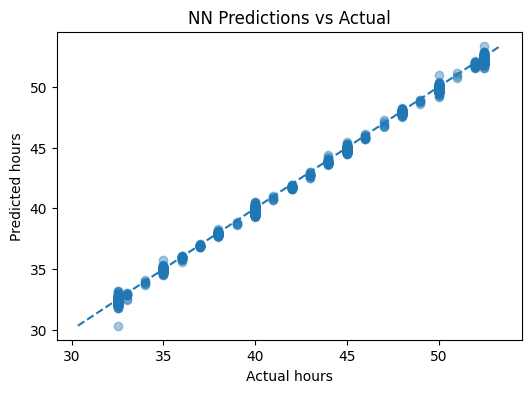

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, deep_pred, alpha=0.4)

min_val = min(y_test.min(), deep_pred.min())
max_val = max(y_test.max(), deep_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.xlabel("Actual hours")
plt.ylabel("Predicted hours")
plt.title("NN Predictions vs Actual")
plt.show()


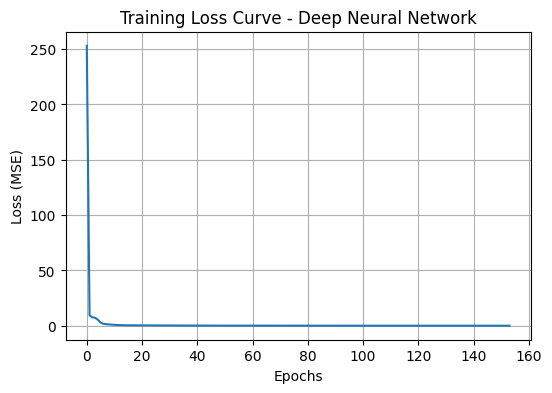

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(deep_nn.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve - Deep Neural Network")
plt.grid(True)
plt.show()


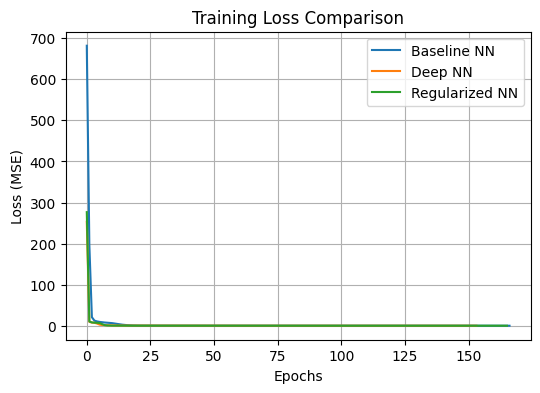

In [14]:
plt.figure(figsize=(6,4))
plt.plot(baseline_nn.loss_curve_, label="Baseline NN")
plt.plot(deep_nn.loss_curve_, label="Deep NN")
plt.plot(regularized_nn.loss_curve_, label="Regularized NN")

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()


##  Summary

Modelul Neural Network a fost ales deoarece poate invata relatii neliniare dintre caracteristici si orele lucrate. A fost folosit un model simplu ca baseline, iar apoi arhitecturi mai profunde pentru imbunatatirea performantei. Functia de pierdere aleasa a fost MSE, deoarece penalizeaza erorile mari. Rezultatele arata ca modelul Deep Neural Network a obtinut cele mai bune performante, cu RMSE mai mic si scor R2 mai mare decat modelele simple. Acest lucru confirma ca relatiile din date sunt complexe si pot fi capturate mai bine de retele neuronale.

Pentru imbunatatiri viitoare se pot testa arhitecturi mai avansate, embedding-uri pentru variabile categoriale si tehnici de regularizare suplimentare.